In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart_disease_uci.csv')

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.shape

(920, 16)

In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
# Pressão sanguínea pode ser um indicador importante para doenças cardíacas
# Pode estar associada a outras coisas?


In [7]:
import matplotlib.pyplot as plt

num_cols = ['id', 'age', 'trestbps', 'chol', 'thalch', 'ca',  'num']

corr = df[num_cols].corr()

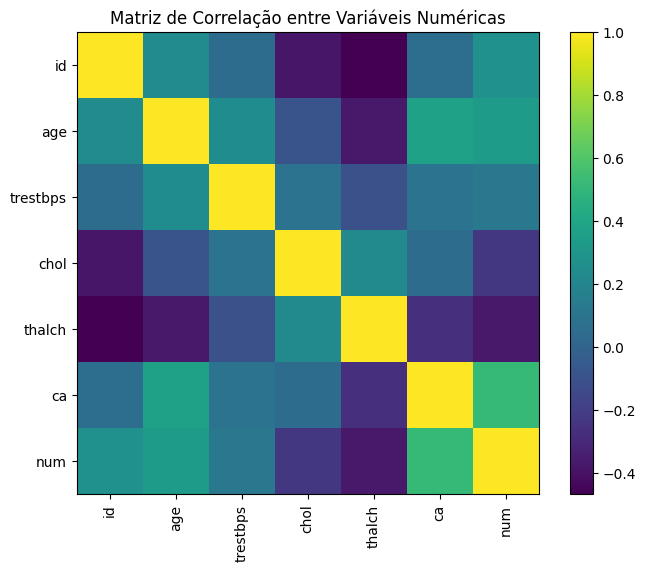

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, interpolation='None')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Verificar as correlaçÕes com pesquisa

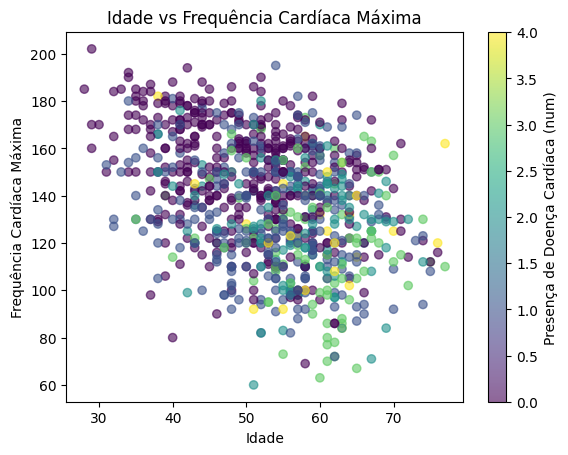

In [9]:
plt.figure()
plt.scatter(df['age'], df['thalch'], c=df['num'], alpha=0.6)
plt.xlabel('Idade')
plt.ylabel("Frequência Cardíaca Máxima")
plt.title('Idade vs Frequência Cardíaca Máxima')
plt.colorbar(label='Presença de Doença Cardíaca (num)')
plt.show()

In [10]:
# Principais colunas: Pressão arterial (trestbps), colesterol (chol), frequência cardíaca máxima (thalch)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [11]:
# Utilizando fonte: https://www.cdc.gov/heart-disease/about/index.html
df['cv_risk_copilot'] = df['trestbps'] + df['chol'] - df['thalch']
df['cv_risk_science'] = df['trestbps'] + df['chol']
df['glicemia_colesterol'] = df['fbs'] + df['chol']
df['triple_conjunt_effect'] = df['trestbps']*df['chol']*df['age']
df['heart_disease'] = df['num']!=0
df['heart_disease'] = df['heart_disease'].astype(int)

In [12]:
num_cols = ['heart_disease', 'age', 'trestbps', 'chol', 'thalch', 'ca',  'num', 'cv_risk_copilot', 'cv_risk_science', 'glicemia_colesterol', 'triple_conjunt_effect']

corr = df[num_cols].corr()


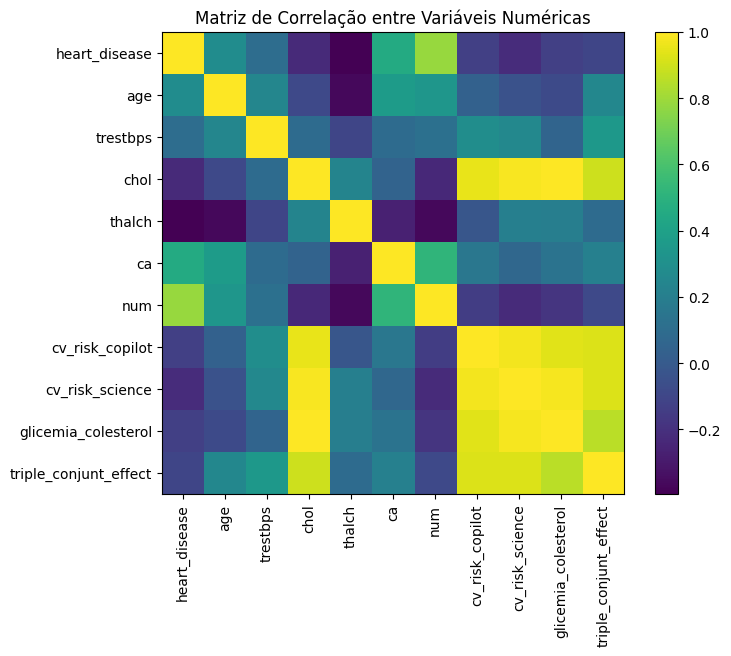

In [13]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, interpolation='None')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Verificar as correlaçÕes com pesquisa

In [14]:
corr

,heart_disease,age,trestbps,chol,thalch,ca,num,cv_risk_copilot,cv_risk_science,glicemia_colesterol,triple_conjunt_effect
heart_disease,1.000000,0.282700,0.106233,-0.230583,-0.394503,0.455599,0.783387,-0.128356,-0.215888,-0.131797,-0.101068
age,0.282700,1.000000,0.244253,-0.086234,-0.365778,0.370416,0.339596,0.039697,-0.043400,-0.083393,0.253197
trestbps,0.106233,0.244253,1.000000,0.092853,-0.104899,0.093705,0.122291,0.289795,0.257608,0.055369,0.348965
chol,-0.230583,-0.086234,0.092853,1.000000,0.236121,0.051606,-0.231547,0.953286,0.985995,0.999992,0.894478
thalch,-0.394503,-0.365778,-0.104899,0.236121,1.000000,-0.264094,-0.366265,-0.022345,0.206238,0.202254,0.092973
ca,0.455599,0.370416,0.093705,0.051606,-0.264094,1.000000,0.516216,0.160273,0.073542,0.134888,0.210891
num,0.783387,0.339596,0.122291,-0.231547,-0.366265,0.516216,1.000000,-0.141539,-0.222582,-0.179369,-0.088936
cv_risk_copilot,-0.128356,0.039697,0.289795,0.953286,-0.022345,0.160273,-0.141539,1.000000,0.973649,0.937255,0.924941
cv_risk_science,-0.215888,-0.043400,0.257608,0.985995,0.206238,0.073542,-0.222582,0.973649,1.000000,0.981432,0.926490
glicemia_colesterol,-0.131797,-0.083393,0.055369,0.999992,0.202254,0.134888,-0.179369,0.937255,0.981432,1.000000,0.856431


## Preparação dos Dados e Codificação

Para treinar um modelo de regressão logística, é necessário transformar as variáveis categóricas em representações numéricas.
Utilizamos `pandas.get_dummies` para criar *dummies* das variáveis categóricas (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`)
e mantemos as variáveis numéricas originais. O ID e a coluna `dataset` são descartados, já que não aportam informação preditiva.

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
# Listar colunas categóricas
autos_categoricas = ['sex','cp','fbs','restecg','exang','slope','thal']

# Criar dummies (dropar primeira coluna para evitar colinearidade)
df_encoded = pd.get_dummies(df.drop(columns=['id','dataset']), columns=autos_categoricas, drop_first=True)

# Selecionar X e y
X = df_encoded.drop(columns=['heart_disease','num'])
y = df_encoded['heart_disease']

# Preencher possíveis valores ausentes nas features numéricas
X = X.fillna(X.median())

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Exibir dimensões
X_train.shape, X_test.shape

((690, 22), (230, 22))

## Modelo Explainable Boosting Machine (EBM)

O EBM (Explainable Boosting Machine) é um modelo glassbox baseado em Generalized Additive Models
com termos de interação aprendidos automaticamente. Ele combina:

- interpretabilidade direta (gráficos de impacto 1D e 2D),
- bom desempenho preditivo, geralmente próximo a modelos de árvore,
- suporte nativo a variáveis categóricas,
- aprendizado de funções suaves para cada feature.

Ao contrário da regressão logística, o EBM não assume linearidade; ele aprende funções
não lineares independentes para cada variável.

**Importante:** o EBM aceita variáveis categóricas diretamente como `category` ou `string`.
Não é necessário (nem desejável) fazer dummies manualmente.


In [18]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Copiar o df original sem dummies
df2 = df.drop(columns=['id','dataset']).copy()

# Transformar categóricas para 'category'
categoricas = ['sex','cp','fbs','restecg','exang','slope','thal']
for col in categoricas:
    df2[col] = df2[col].astype('category')

# Selecionar X e y
X = df2.drop(columns=['heart_disease','num'])
y = df2['heart_disease']

# Tratamento básico de nulos
X = X.fillna(X.median(numeric_only=True))

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Treinar EBM
ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_train, y_train)

# Predições
preds = ebm.predict(X_test)
proba = ebm.predict_proba(X_test)[:,1]

# Métricas
print("AUC:", roc_auc_score(y_test, proba))
print("\nClassification Report:\n", classification_report(y_test, preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))

# Visualização global
ebm_global = ebm.explain_global()
show(ebm_global)

# Visualização local de um exemplo
idx = 10
ebm_local = ebm.explain_local(X_test.iloc[idx:idx+1], y_test.iloc[idx:idx+1])
show(ebm_local)


c:\Users\gabri\anaconda3\envs\simm_flot\lib\site-packages\interpret\glassbox\_ebm\_ebm.py:669: UserWarning: Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]
  warn(


AUC: 0.9094105955202201

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       103
           1       0.83      0.84      0.84       127

    accuracy                           0.82       230
   macro avg       0.82      0.81      0.82       230
weighted avg       0.82      0.82      0.82       230


Confusion Matrix:
 [[ 81  22]
 [ 20 107]]


c:\Users\gabri\anaconda3\envs\simm_flot\lib\site-packages\interpret\visual\_udash.py:117: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<!-- http://127.0.0.1:7001/2275240160144/ -->

c:\Users\gabri\anaconda3\envs\simm_flot\lib\site-packages\interpret\visual\_udash.py:117: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<!-- http://127.0.0.1:7001/2274931581728/ -->

## SHAP aplicado ao EBM

O EBM já é um modelo glassbox, com funções de efeito por variável e explicações
locais embutidas (`explain_global`, `explain_local`). Ainda assim, podemos aplicar
SHAP ao EBM tratando-o como uma caixa-preta: passamos uma função de predição
(`predict_proba`) para o `KernelExplainer`.

Isso permite:
- comparar as explicações SHAP com as curvas de efeito do EBM;
- manter um padrão único de explicabilidade quando usamos outros modelos
  no mesmo projeto (árvores, boosting, etc.).

O custo: o `KernelExplainer` é bem mais pesado computacionalmente, então
usamos amostras reduzidas de background e de teste.


In [19]:
import shap

shap.initjs()


3. Definir função de predição e background

Aqui você diz ao SHAP:

“Essa é a função que você tem que explicar, usando esse conjunto de background.”

In [ ]:
# Função de predição: probabilidade da classe positiva
def ebm_predict_proba(X):
    return ebm.predict_proba(X)[:, 1]

# Background: pequena amostra do treino para aproximar a distribuição
background = X_train.sample(n=50, random_state=42)  # pode ajustar


In [21]:
# 4. Criar o KernelExplainer e calcular SHAP values

# Cuidado: isso é lento se você enfiar o X_test inteiro. Usa amostra.

# Criar o explicador SHAP para o EBM como caixa-preta
explainer = shap.KernelExplainer(ebm_predict_proba, background)

# Amostra do conjunto de teste para explicação
X_test_sample = X_test.sample(n=100, random_state=42)

# Calcular valores SHAP (para a probabilidade da classe positiva)
shap_values = explainer.shap_values(X_test_sample)


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

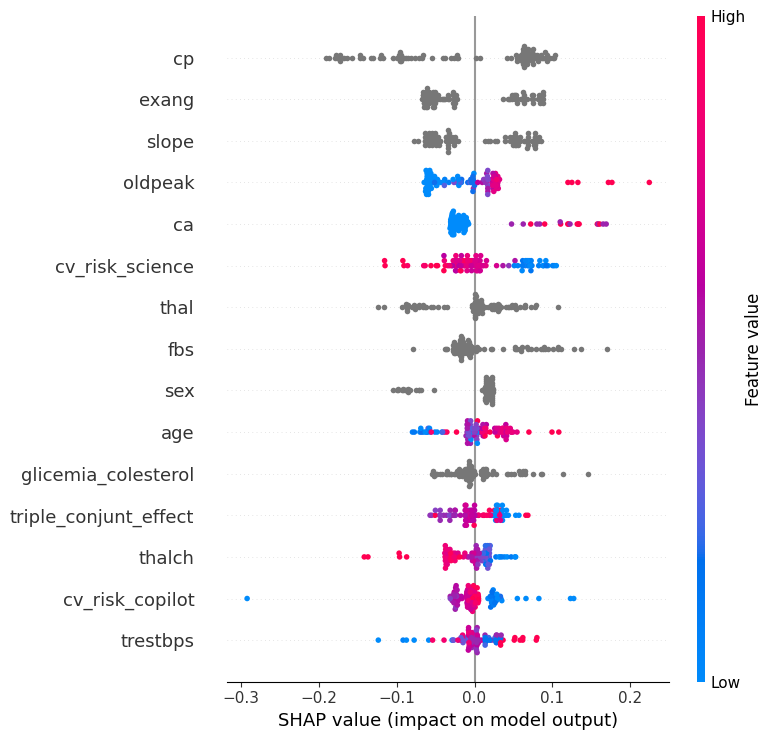

In [22]:
# 5. SHAP global: summary plot (tipo beeswarm)
shap.summary_plot(
    shap_values,
    X_test_sample,
    feature_names=X_test_sample.columns,
    max_display=15
)


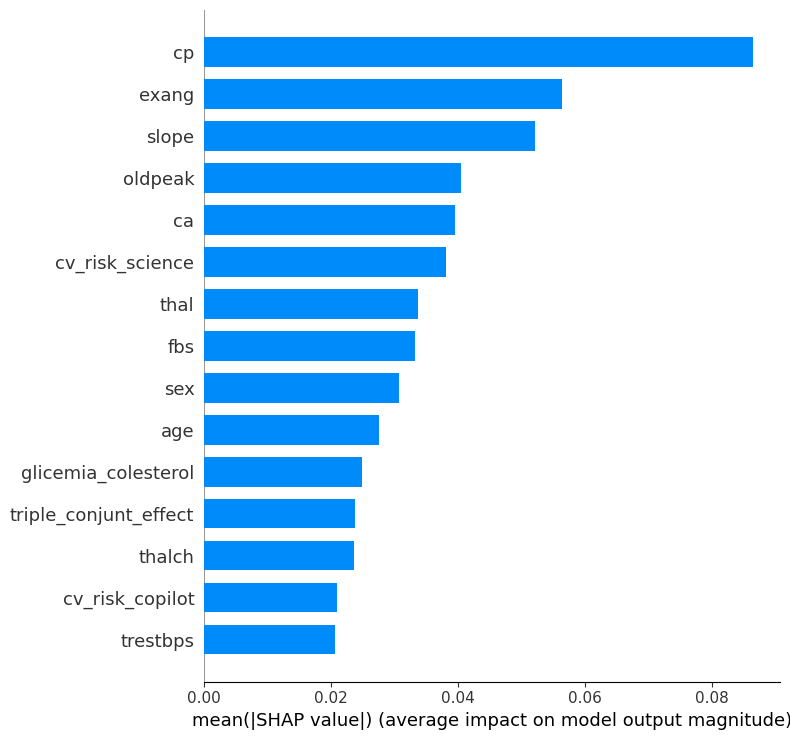

In [23]:
shap.summary_plot(
    shap_values,
    X_test_sample,
    feature_names=X_test_sample.columns,
    plot_type="bar",
    max_display=15
)


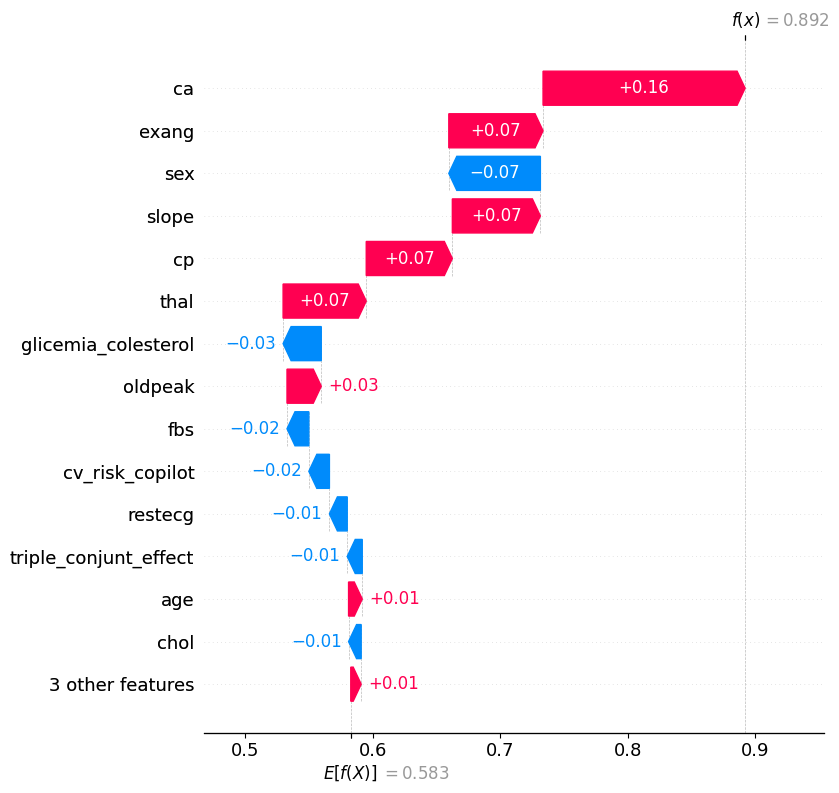

In [24]:
# Escolher um exemplo da amostra
idx = 0  # ou outro índice

shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[idx],
    feature_names=X_test_sample.columns,
    max_display=15
)
